#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

warnings.simplefilter('ignore')

In [2]:
boston = load_boston()
data = boston["data"]
data.shape

(506, 13)

In [3]:
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["PRICE"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


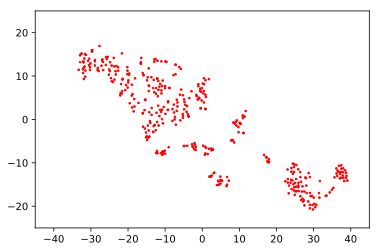

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],s = 3, c = 'r')
rcParams["figure.figsize"] = 6, 6
plt.axis([-45, 45, -25, 25])
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=3, max_iter = 100, random_state=42)

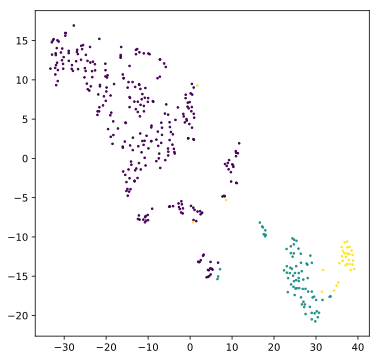

In [10]:
labels_train = model.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, s = 3)

plt.show()

In [11]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [12]:
y_train.head()

,PRICE
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2


In [13]:
X_train['PRICE'] = y_train['PRICE']
X_train['CLUSTER'] = labels_train

In [39]:
X_train.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CLUSTER
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5,0
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1,0
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5,0
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4,2
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6,2


In [40]:
X_train_agg = X_train.groupby('CLUSTER').agg({'PRICE': 'mean','CRIM': 'mean'})

In [41]:
X_train_agg.head()

,PRICE,CRIM
CLUSTER,,
0,25.168687,0.404863
1,17.442105,11.745662
2,13.196774,14.037800
